In [1]:
import pandas as pd

In [2]:
GS_data_set = {}
CS_data_set = {}

for year in range(2013,2026):
    GS_data_set[year] = pd.read_parquet(f"C:/Users/31155/Dropbox/EV-GasDualNetwork/Data/intermediate/yiwei/intermidiate/GS_cleaned/GS_data_cleaned_{year}.parquet")
    print(year," GS ",len(GS_data_set[year]))
for year in range(2015,2026):
    CS_data_set[year] = pd.read_parquet(f"C:/Users/31155/Dropbox/EV-GasDualNetwork/Data/intermediate/yiwei/intermidiate/CS_cleaned/CS_data_cleaned_{year}.parquet")
    print(year," CS ",len(CS_data_set[year]))

2013  GS  98458
2014  GS  102642
2015  GS  117307
2016  GS  118338
2017  GS  118193
2018  GS  104177
2019  GS  109464
2020  GS  113399
2021  GS  116279
2022  GS  105157
2023  GS  112000
2024  GS  113219
2025  GS  114421
2015  CS  1829
2016  CS  1870
2017  CS  4220
2018  CS  33175
2019  CS  56250
2020  CS  72149
2021  CS  93798
2022  CS  96181
2023  CS  118293
2024  CS  182254
2025  CS  265110


In [3]:
example_data = GS_data_set[2025]
example_data

,id,name,address,wgs84_x,wgs84_y,tel,pname,cityname,adname,大类,中类,小类,updatetime,pname_EN,cityname_EN,corporation,paused
0,B001501DCD,中国石化久华加油站,迎宾大道5501号,121.799499,31.160551,021-68351125,上海市,上海市,浦东新区,汽车服务,加油站,中国石化,2025/6/16 22:26,Shanghai,Shanghai,CPCC,0
1,B0J3NSTWNI,中国石油加油站(古棕路站),古棕路800弄1-2号,121.907841,30.880990,021-58127160,上海市,上海市,浦东新区,汽车服务,加油站,中国石油,2025/6/15 1:52,Shanghai,Shanghai,CNPC,0
2,B0FFGWIMRR,中国石化海洪加油站,三星镇海洪港村草棚1129号,121.271779,31.744409,021-59601517,上海市,上海市,崇明区,汽车服务,加油站,中国石化,2025/6/17 2:25,Shanghai,Shanghai,CPCC,0
3,B0FFGWIMRN,中国石油加油站(崇明第五站),宏海公路4701号,121.279546,31.749067,[],上海市,上海市,崇明区,汽车服务,加油站,中国石油,2025/6/13 12:52,Shanghai,Shanghai,CNPC,0
4,B0FFG744L0,中国石化海桥加油站,三星镇北桥村三官1033号,121.287427,31.791514,021-59302017,上海市,上海市,崇明区,汽车服务,加油站,中国石化,2025/6/5 7:03,Shanghai,Shanghai,CPCC,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118309,B0307010QN,清湾供销社加油站,441县道与014乡道交叉口西460米,110.603826,22.230772,[],广西壮族自治区,玉林市,北流市,汽车服务,加油站,加油站,2025-06-17 12:48:46,Guangxi Zhuang Autonomous Region,Yulin City,None,0
118310,B0IGYZAEOI,中国石化广西玉林北流六靖那排加油站,六靖镇那排村古城组,110.572521,22.252504,0775-6513521,广西壮族自治区,玉林市,北流市,汽车服务,加油站,中国石化,2025-06-05 08:50:44,Guangxi Zhuang Autonomous Region,Yulin City,None,0
118311,B03070NFU9,中国石油广西玉林北流清宝加油站,清湾镇北宝二级路73号公里处,110.665326,22.169268,[],广西壮族自治区,玉林市,北流市,汽车服务,加油站,中国石油,2025-06-12 11:19:50,Guangxi Zhuang Autonomous Region,Yulin City,None,0
118312,B0307011MG,中国石化六靖镇东加油站,六靖镇镇东路,110.539343,22.254306,0775-6561318,广西壮族自治区,玉林市,北流市,汽车服务,加油站,中国石化,2025-06-17 12:04:47,Guangxi Zhuang Autonomous Region,Yulin City,None,0


Total hexagons in Shanghai: 759
hex
88309baf09fffff    4
8830994c19fffff    4
8830982eb9fffff    3
88309864d5fffff    3
88309959a3fffff    2
Name: count, dtype: int64


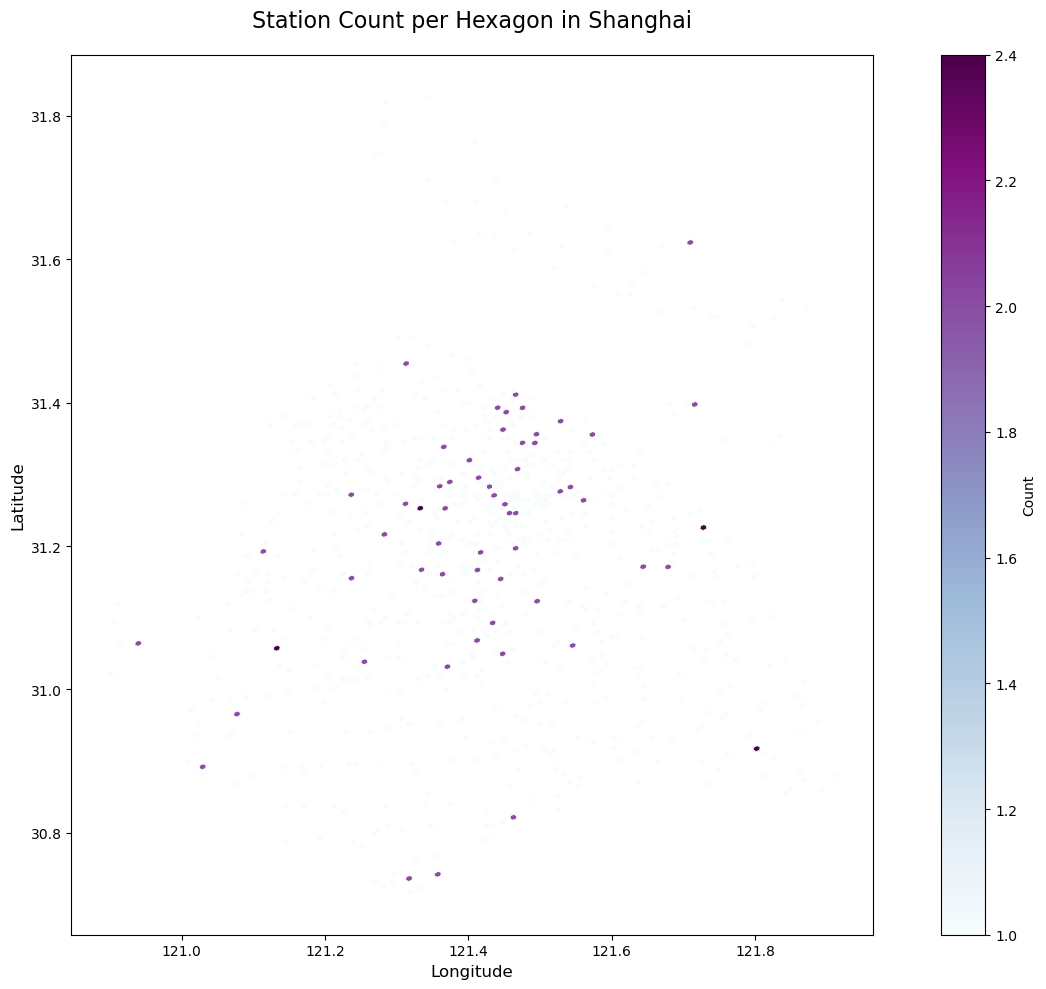

In [18]:
import h3
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import numpy as np

# Custom function to plot H3 hexagons
def plot_hexagons(hexagons, values=None, ax=None, edge_color='white', 
                  cmap='viridis', colorbar=True, alpha=0.8, **kwargs):
    """
    Plot H3 hexagons with color-coded values
    
    Parameters:
    -----------
    hexagons : list
        List of H3 indices
    values : array-like, optional
        Values for each hexagon (for coloring)
    ax : matplotlib axis, optional
        Axis object for plotting
    edge_color : str
        Edge color
    cmap : str
        Colormap
    colorbar : bool
        Whether to show colorbar
    alpha : float
        Transparency
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 10))
    else:
        fig = ax.get_figure()
    
    patches = []
    for hex_id in hexagons:
        # Get hexagon boundary
        boundary = h3.cell_to_boundary(hex_id)
        # Convert to (lng, lat) for plotting
        boundary_plot = [(lng, lat) for lat, lng in boundary]
        patches.append(Polygon(boundary_plot))
    
    # Create PatchCollection
    p = PatchCollection(patches, cmap=cmap, alpha=alpha, 
                       edgecolor=edge_color, linewidth=0.5, **kwargs)
    
    # Set colors if values provided
    if values is not None:
        p.set_array(np.array(values))
        p.set_clim(vmin=min(values), vmax=max(values)*0.6)  # Adjust color limits
    
    ax.add_collection(p)
    
    # Auto-adjust axis range
    ax.autoscale_view()
    ax.set_aspect('equal')
    
    # Add colorbar
    if colorbar and values is not None:
        fig.colorbar(p, ax=ax, label='Count')

    ax.set_xlabel('Longitude', fontsize=12)
    ax.set_ylabel('Latitude', fontsize=12)

    return ax


# Main code
city_name = 'Shanghai'
city_data = example_data[example_data['cityname_EN'] == city_name].copy()

# Map each station to a hexagon
resolution = 8
city_data['hex'] = city_data.apply(
    lambda row: h3.latlng_to_cell(row['wgs84_y'], row['wgs84_x'], resolution), 
    axis=1
)

# Count stations per hexagon
hex_counts = city_data['hex'].value_counts()

print(f"Total hexagons in {city_name}: {len(hex_counts)}")
print(hex_counts.head())

# Visualize hexagons
fig, ax = plt.subplots(figsize=(14, 10))
plot_hexagons(
    hex_counts.index.tolist(),
    values=hex_counts.values,
    ax=ax,
    edge_color='white',
    cmap='BuPu',
    colorbar=True,
    alpha=1
)
plt.title(f"Station Count per Hexagon in {city_name}", fontsize=16, pad=20)
plt.tight_layout()
plt.show()

Total hexagons in Shanghai and Pudong New Area: 150
hex
88309baf09fffff    4
8830994c19fffff    4
8830994243fffff    2
8830994109fffff    2
88309b84cbfffff    2
Name: count, dtype: int64


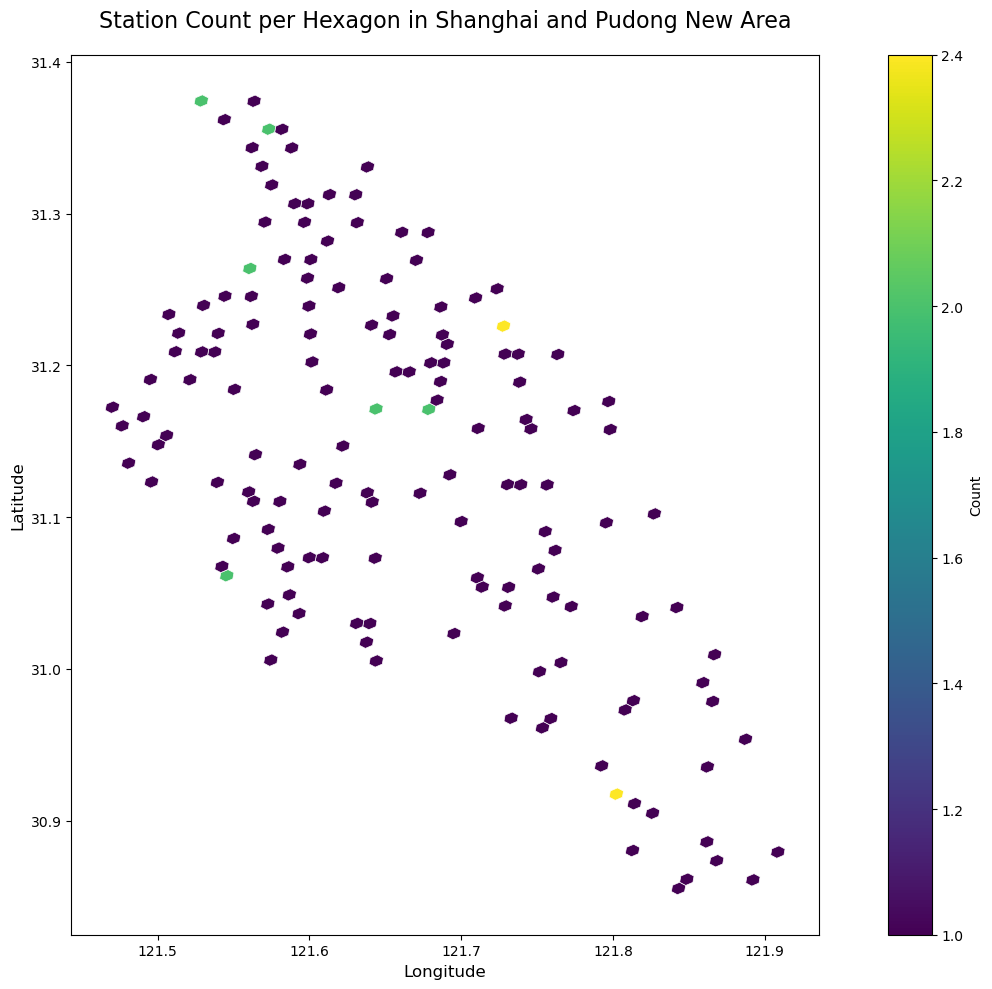

In [19]:
# Main code
city_name = 'Shanghai'
adname = '浦东新区'
adname_EN = 'Pudong New Area'
filter = (example_data['cityname_EN'] == city_name) & (example_data['adname'] == adname)
city_data = example_data[filter].copy()

# Map each station to a hexagon
resolution = 8
city_data['hex'] = city_data.apply(
    lambda row: h3.latlng_to_cell(row['wgs84_y'], row['wgs84_x'], resolution), 
    axis=1
)

# Count stations per hexagon
hex_counts = city_data['hex'].value_counts()

print(f"Total hexagons in {city_name} and {adname_EN}: {len(hex_counts)}")
print(hex_counts.head())

# Visualize hexagons
fig, ax = plt.subplots(figsize=(14, 10))
plot_hexagons(
    hex_counts.index.tolist(),
    values=hex_counts.values,
    ax=ax,
    edge_color='white',
    cmap='viridis',
    colorbar=True,
    alpha=1
)
plt.title(f"Station Count per Hexagon in {city_name} and {adname_EN}", fontsize=16, pad=20)
plt.tight_layout()
plt.show()

In [ ]:
resolution = 8
example_data['hex'] = example_data.apply(
    lambda row: h3.latlng_to_cell(row['wgs84_y'], row['wgs84_x'], resolution), 
    axis=1
)
example_data

In [ ]:
def get_hex_set(data, resolution=8):
    return set(data.apply(lambda row: h3.latlng_to_cell(row['wgs84_y'], row['wgs84_x'], resolution), axis=1))

def match_ratio(hex_set1, hex_set2):
    return len(hex_set1 & hex_set2) / len(hex_set1) if hex_set1 else 0

for dataset_name, dataset in [('GS', GS_data_set), ('CS', CS_data_set)]:
    years = sorted(dataset.keys())
    print(f"\n{dataset_name} Hex Match Ratios:")
    for i in range(len(years)-1):
        year1, year2 = years[i], years[i+1]
        hex_set1 = get_hex_set(dataset[year1])
        hex_set2 = get_hex_set(dataset[year2])
        ratio = match_ratio(hex_set1, hex_set2)
        print(f"{year1} to {year2}: {ratio:.2%} ({len(hex_set1 & hex_set2)}/{len(hex_set1)})")

In [ ]:
import numpy as np

match_columns = ['pname','cityname','adname','address','name','大类','中类','小类']

GS_anchor_results = {}
GS_distance_stats = {}

for year in range(2013, 2025):
    if year + 1 not in GS_data_set or year not in GS_data_set:
        continue
    df1 = GS_data_set[year]
    df2 = GS_data_set[year + 1]
    # Address filter
    df1 = df1[df1['address'].str.strip().ne('') & df1['address'].str.strip().ne('[]')]
    df2 = df2[df2['address'].str.strip().ne('') & df2['address'].str.strip().ne('[]')]
    # Merge
    merged = pd.merge(df1, df2, on=match_columns, suffixes=('_prev', '_next'))
    GS_anchor_results[year] = merged
    # City stats
    city_counts = merged['cityname'].value_counts().to_dict()
    print(f"Year {year}: matched anchor stations per city:", city_counts)
    # Distance calculation
    merged['shift_x'] = (merged['wgs84_x_next'] - merged['wgs84_x_prev']) * 100000
    merged['shift_y'] = (merged['wgs84_y_next'] - merged['wgs84_y_prev']) * 100000
    GS_distance_stats[year] = {
        'shift_x': merged['shift_x'].describe().to_dict(),
        'shift_y': merged['shift_y'].describe().to_dict()
    }

CS_anchor_results = {}
CS_distance_stats = {}

for year in range(2015, 2025):
    if year + 1 not in CS_data_set or year not in CS_data_set:
        continue
    df1 = CS_data_set[year]
    df2 = CS_data_set[year + 1]
    # Address filter
    df1 = df1[df1['address'].str.strip().ne('') & df1['address'].str.strip().ne('[]')]
    df2 = df2[df2['address'].str.strip().ne('') & df2['address'].str.strip().ne('[]')]
    # Merge
    merged = pd.merge(df1, df2, on=match_columns, suffixes=('_prev', '_next'))
    CS_anchor_results[year] = merged
    # City stats
    city_counts = merged['cityname'].value_counts().to_dict()
    print(f"Year {year}: matched anchor stations per city:", city_counts)
    # Distance calculation
    merged['shift_x'] = (merged['wgs84_x_next'] - merged['wgs84_x_prev']) * 100000
    merged['shift_y'] = (merged['wgs84_y_next'] - merged['wgs84_y_prev']) * 100000
    GS_distance_stats[year] = {
        'shift_x': merged['shift_x'].describe().to_dict(),
        'shift_y': merged['shift_y'].describe().to_dict()
    }

In [ ]:
tmp_year = 2016
df = GS_anchor_results[tmp_year]
result = (
    df.groupby(['pname', 'cityname'])
    .agg(
        shift_x_median=('shift_x', 'median'),
        shift_y_median=('shift_y', 'median'),
        anchor_count=('cityname', 'count')
    )
    .reset_index()
    .sort_values(['pname', 'cityname'])
)
print(f"Year: {tmp_year}")
result

In [ ]:
import numpy as np

def meter_to_latlon_shift(lat, shift_x_m, shift_y_m):
    # 1 degree latitude ≈ 111,320 meters
    dlat = shift_y_m / 111320
    # 1 degree longitude ≈ 111,320 * cos(latitude) meters
    dlon = shift_x_m / (111320 * np.cos(np.radians(lat)))
    return dlon, dlat

def apply_city_shift(df, result):
    df = df.copy()
    for _, row in result.iterrows():
        city = row['cityname']
        sx = row['shift_x_median']
        sy = row['shift_y_median']
        mask = df['cityname'] == city
        dlon, dlat = meter_to_latlon_shift(df.loc[mask, 'wgs84_y'], sx, sy)
        df.loc[mask, 'wgs84_x'] -= dlon
        df.loc[mask, 'wgs84_y'] -= dlat
    return df

# Apply correction to 2017 GS data
GS_2017_corrected = apply_city_shift(GS_data_set[2017], result)

# Matching after correction
def get_hex_set(data, resolution=8):
    return set(data.apply(lambda row: h3.latlng_to_cell(row['wgs84_y'], row['wgs84_x'], resolution), axis=1))

hex_2016 = get_hex_set(GS_data_set[2016])
hex_2017_corr = get_hex_set(GS_2017_corrected)
ratio = len(hex_2016 & hex_2017_corr) / len(hex_2016) if hex_2016 else 0
print(f"2016 to corrected 2017 match ratio: {ratio:.2%} ({len(hex_2016 & hex_2017_corr)}/{len(hex_2016)})")

In [ ]:
for dataset_name, dataset in [('GS', GS_data_set)]:
    years = sorted(dataset.keys())
    print(f"\n{dataset_name} Hex Match Ratios:")
    for i in range(len(years)-1):
        year1, year2 = years[i], years[i+1]
        hex_set1 = get_hex_set(dataset[year1])
        hex_set2 = get_hex_set(dataset[year2])
        ratio = match_ratio(hex_set1, hex_set2)
        df = GS_anchor_results[i+2013]
        result = (
            df.groupby(['pname', 'cityname'])
            .agg(
                shift_x_median=('shift_x', 'median'),
                shift_y_median=('shift_y', 'median'),
                anchor_count=('cityname', 'count')
            )
            .reset_index()
            .sort_values(['pname', 'cityname'])
        )
        year2_corrected = apply_city_shift(dataset[year2], result)
        hex_set2_corr = get_hex_set(year2_corrected)
        ratio_corr = match_ratio(hex_set1, hex_set2_corr)
        print(f"{year1} to {year2}: before correction: {ratio:.2%}, after correction: {ratio_corr:.2%}")

In [ ]:
for dataset_name, dataset in [('CS', CS_data_set)]:
    years = sorted(dataset.keys())
    print(f"\n{dataset_name} Hex Match Ratios:")
    for i in range(len(years)-1):
        year1, year2 = years[i], years[i+1]
        hex_set1 = get_hex_set(dataset[year1])
        hex_set2 = get_hex_set(dataset[year2])
        ratio = match_ratio(hex_set1, hex_set2)
        df = CS_anchor_results[i+2015]
        result = (
            df.groupby(['pname', 'cityname'])
            .agg(
                shift_x_median=('shift_x', 'median'),
                shift_y_median=('shift_y', 'median'),
                anchor_count=('cityname', 'count')
            )
            .reset_index()
            .sort_values(['pname', 'cityname'])
        )
        year2_corrected = apply_city_shift(dataset[year2], result)
        hex_set2_corr = get_hex_set(year2_corrected)
        ratio_corr = match_ratio(hex_set1, hex_set2_corr)
        print(f"{year1} to {year2}: before correction: {ratio:.2%}, after correction: {ratio_corr:.2%}")